In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df['Id'].dtype

dtype('int64')

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df.isnull().sum().sort_values(ascending=False).head(15)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
dtype: int64

In [ ]:
Y=df['SalePrice']
id=df['Id']
testId = test['Id']
X=df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','SalePrice'],axis=1)
test=test.drop(['Id','PoolQC','MiscFeature','Alley','Fence'],axis=1)

In [ ]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


In [ ]:
for column in X.columns:
    typ = X[column].dtype
    if typ == "object":
        X[column] = X[column].fillna(X[column].mode()[0])
        test[column] = test[column].fillna(test[column].mode()[0])
    else:
        X[column] = X[column].fillna(X[column].mean())
        test[column] = test[column].fillna(test[column].mean())

In [ ]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [ ]:
X.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = le.fit_transform(X[col]).astype(int)
        test[col] = le.fit_transform(test[col]).astype(int)

In [ ]:
X.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,3.028767,70.049958,10516.828082,0.995890,1.942466,2.777397,0.000685,3.019178,0.062329,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,7.513014,3.770548
std,42.300571,0.632017,22.024023,9981.264932,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000
25%,20.000000,3.000000,60.000000,7553.500000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000
50%,50.000000,3.000000,70.049958,9478.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000
75%,70.000000,3.000000,79.000000,11601.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000
max,190.000000,4.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000


In [ ]:
X.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
MSSubClass,1.000000,0.035900,-0.357056,-0.139781,-0.024969,0.119289,-0.002940,-2.284384e-02,0.075910,-0.025672,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940
MSZoning,0.035900,1.000000,-0.106363,-0.034452,0.087654,0.061887,-0.017854,-1.192034e-03,-0.009895,-0.022055,...,-0.154704,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494
LotFrontage,-0.357056,-0.106363,1.000000,0.306795,-0.037323,-0.144931,-0.075647,-5.447825e-18,-0.181253,0.067608,...,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,-0.030846,0.058464
LotArea,-0.139781,-0.034452,0.306795,1.000000,-0.197131,-0.165315,-0.149083,1.012318e-02,-0.121161,0.436868,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.012292,0.034169
Street,-0.024969,0.087654,-0.037323,-0.197131,1.000000,-0.010224,0.115995,1.681767e-03,0.013960,-0.179360,...,-0.005664,0.023082,0.007473,-0.033160,0.004413,-0.022733,0.003690,-0.025043,0.014339,0.006064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MiscVal,-0.007683,0.009293,0.001168,0.038068,-0.022733,-0.042061,0.020912,-2.295681e-03,-0.018427,-0.003518,...,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,-0.006495,0.004906,0.015773,0.013027
MoSold,-0.013585,-0.031496,0.010158,0.001205,0.003690,-0.033455,-0.011599,-5.155166e-02,0.018902,0.007072,...,0.071255,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,-0.047386,0.013320
YrSold,-0.021407,-0.020628,0.006768,-0.014261,-0.025043,0.036449,0.020507,2.335254e-02,-0.005992,-0.002305,...,-0.057619,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.002327,0.003880
SaleType,0.012464,0.097437,-0.030846,0.012292,0.014339,-0.000911,-0.025754,-1.267697e-01,0.014325,0.054858,...,-0.013594,-0.016731,-0.009034,0.004533,0.011009,0.015773,-0.047386,-0.002327,1.000000,0.184067


<Axes: >

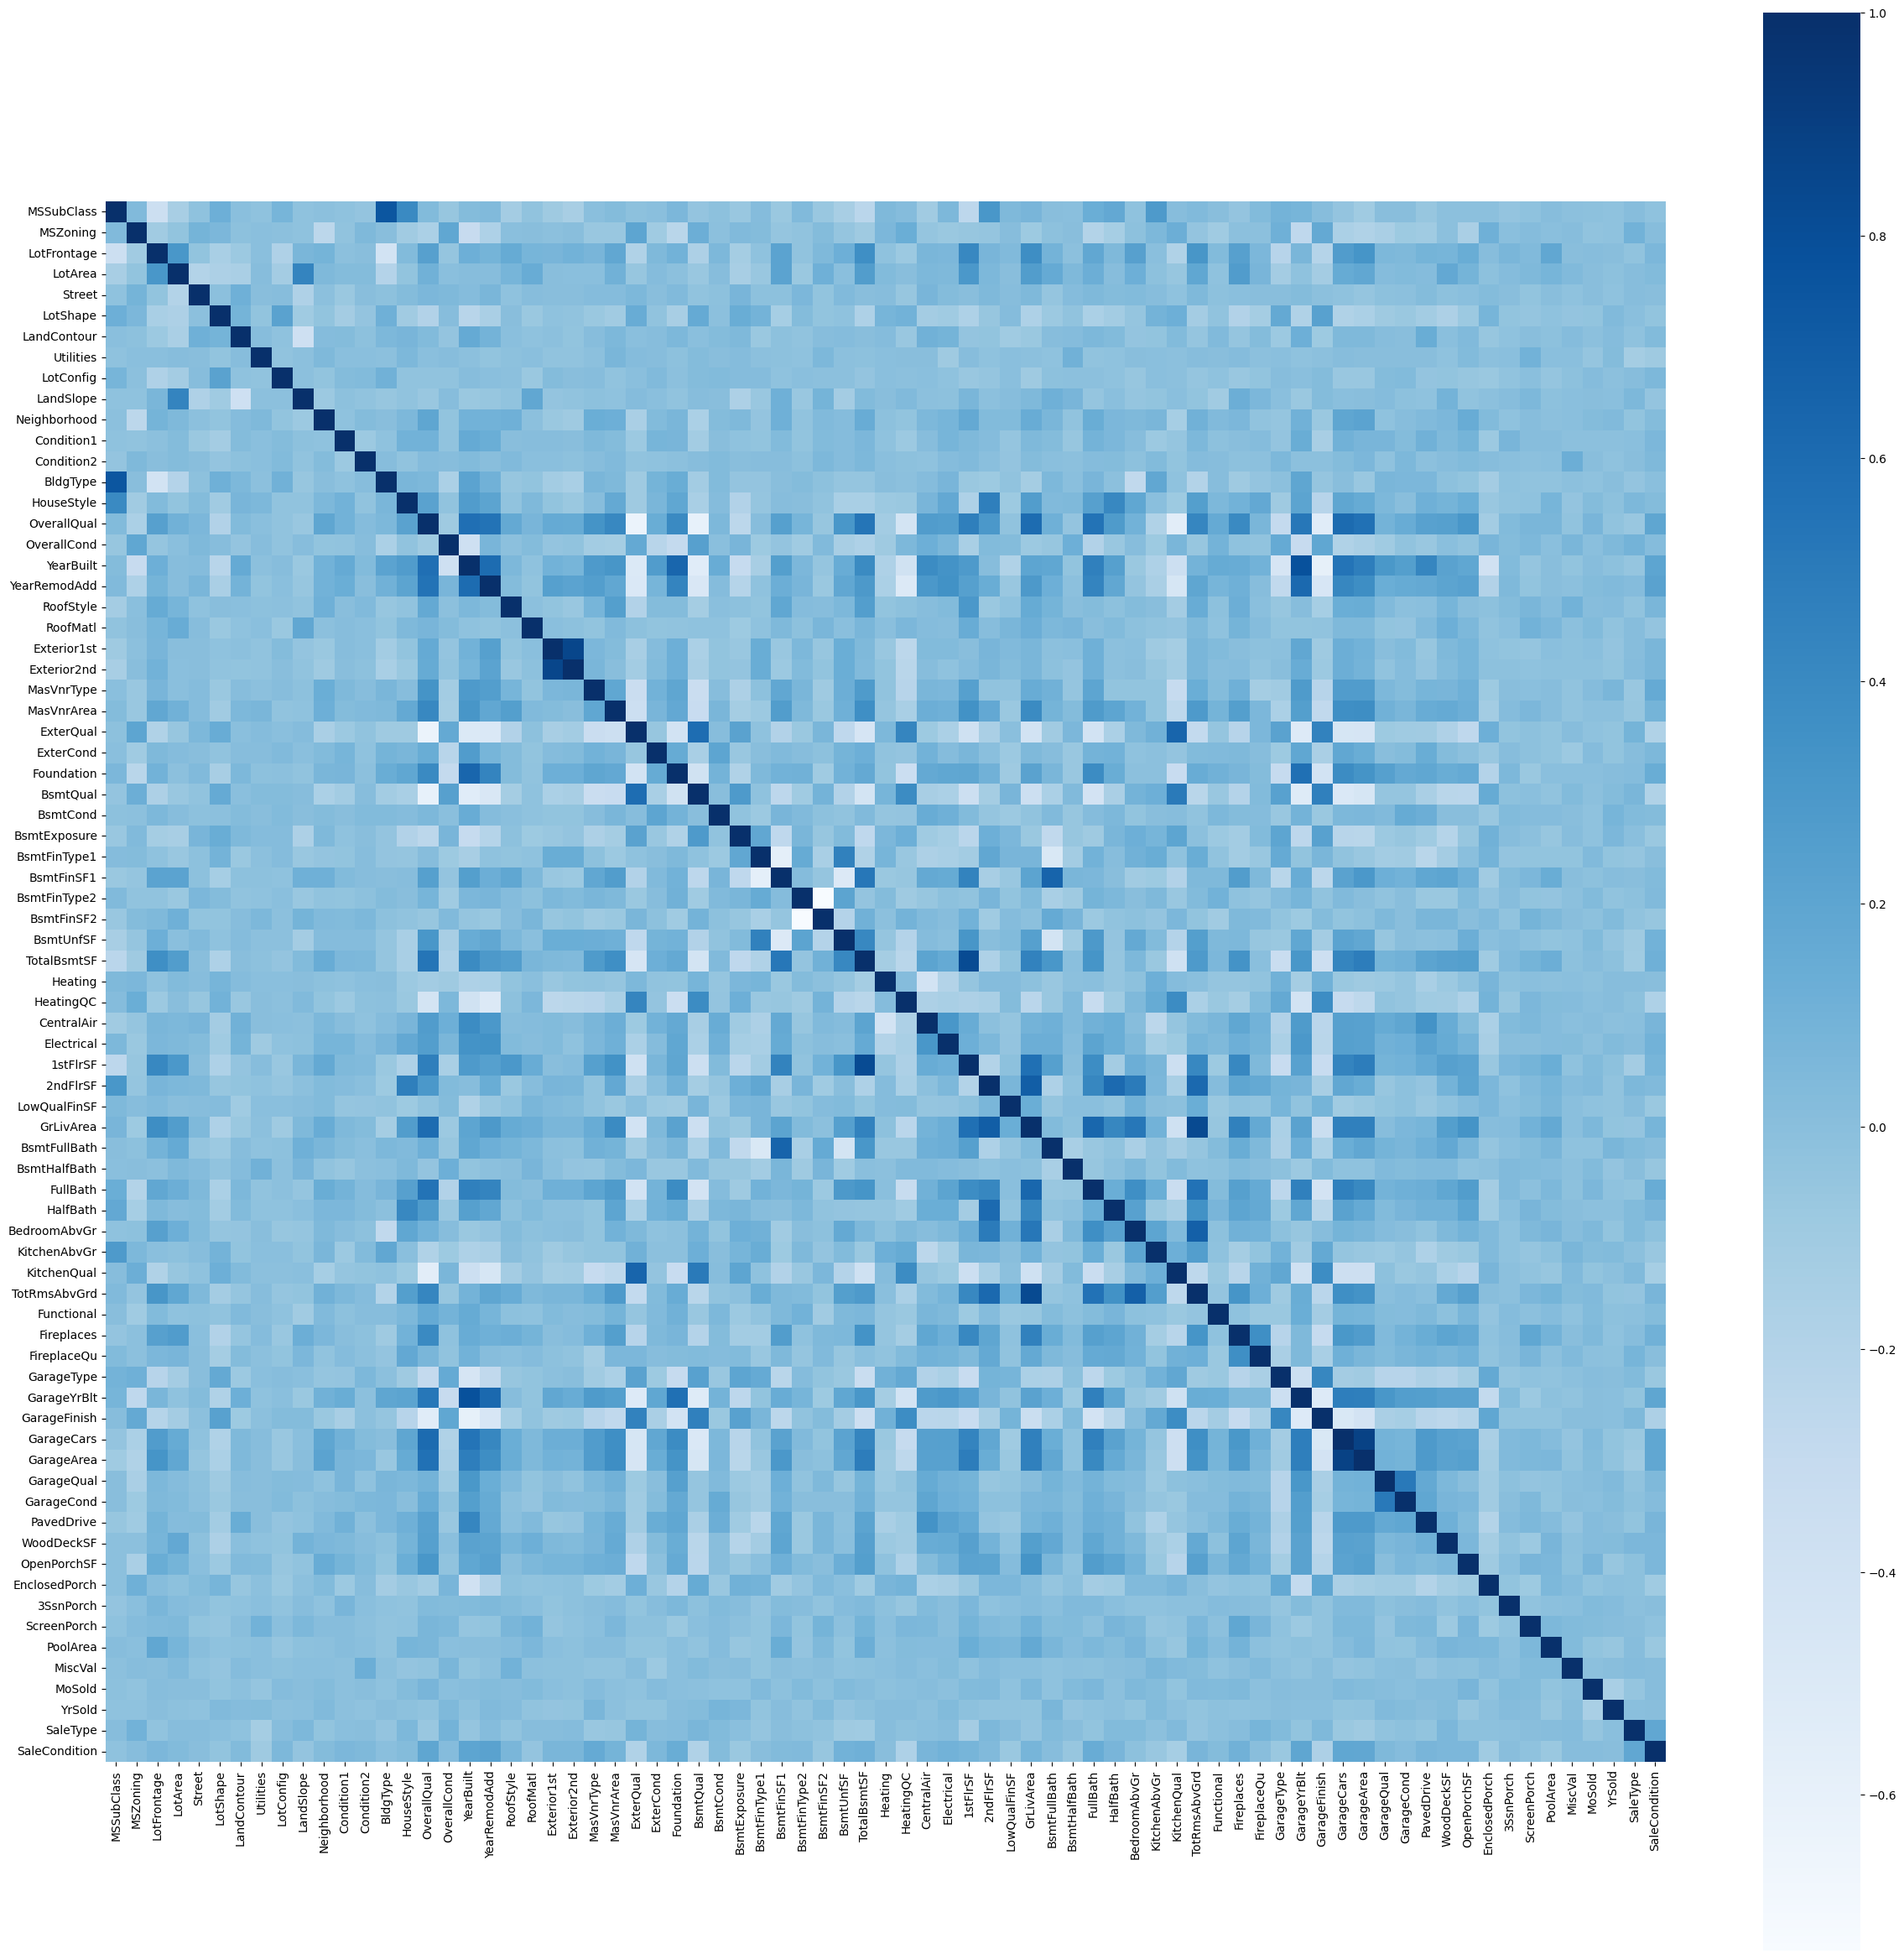

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(X.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':5}, cmap='Blues')

In [ ]:
Y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

<ipython-input-142-bf73340785e9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y, kde=True)


<Axes: xlabel='SalePrice', ylabel='Density'>

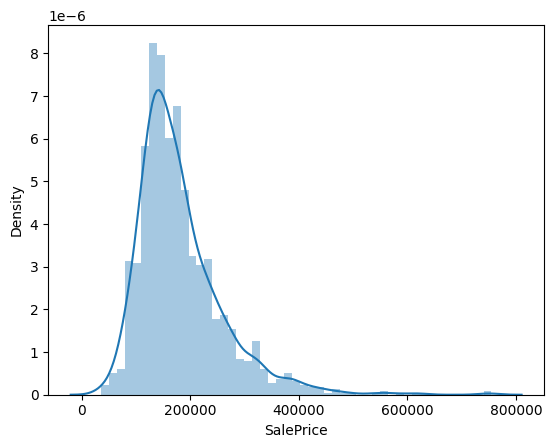

In [ ]:
sns.distplot(Y, kde=True)

In [ ]:
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

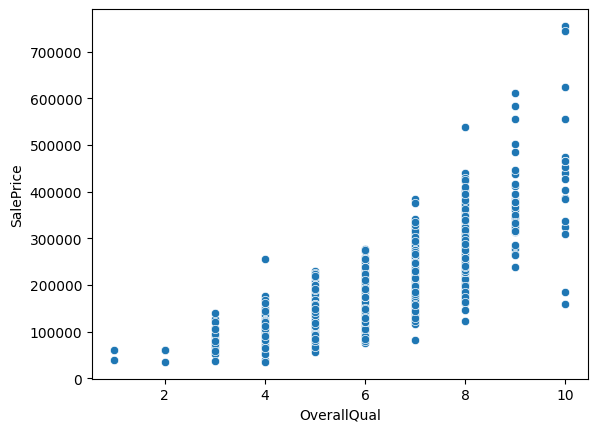

In [ ]:
sns.scatterplot(x=X['OverallQual'], y=Y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1168, 75), (292, 75), (1168,), (292,))

In [ ]:
from sklearn.linear_model import Lasso
model=Lasso()
model.fit(X_train,Y_train)

Lasso()

In [ ]:
Y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f"Mean Square Error : {mean_squared_error(Y_pred, Y_test)}")
print(f"Mean Absolute Error : {mean_absolute_error(Y_pred, Y_test)}")

Mean Square Error : 797053341.7048836
Mean Absolute Error : 19664.50499991308


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
print(f"Mean Square Error RF: {mean_squared_error(Y_pred_rf, Y_test)}")
print(f"Mean Absolute Error RF: {mean_absolute_error(Y_pred_rf, Y_test)}")

Mean Square Error RF: 724723805.2814323
Mean Absolute Error RF: 18287.687397260277


In [ ]:
from sklearn.metrics import r2_score
print("R2_score for rf = ", r2_score(Y_pred_rf, Y_test))

R2_score for rf =  0.8626805107499929


In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train,Y_train)
Y_pred_svr = svr.predict(X_test)
print(f"Mean Square Error SVR: {mean_squared_error(Y_pred_svr, Y_test)}")
print(f"Mean Absolute Error SVR: {mean_absolute_error(Y_pred_svr, Y_test)}")

Mean Square Error SVR: 7167765380.353716
Mean Absolute Error SVR: 57886.337488408746


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
linreg=LinearRegression()
ridge = Ridge(alpha=0.1)
linreg.fit(X_train,Y_train)
ridge.fit(X_train,Y_train)
Y_pred_linreg=linreg.predict(X_test)
Y_pred_ridge=ridge.predict(X_test)
print(f"Mean Square Error linearRegression: {mean_squared_error(Y_pred_linreg, Y_test)}")
print(f"Mean Absolute Error LinearRegression: {mean_absolute_error(Y_pred_linreg, Y_test)}")
print(f"Mean Square Error Ridge: {mean_squared_error(Y_pred_ridge, Y_test)}")
print(f"Mean Absolute Error Ridge: {mean_absolute_error(Y_pred_ridge, Y_test)}")

Mean Square Error linearRegression: 797168282.6779269
Mean Absolute Error LinearRegression: 19665.681092270337
Mean Square Error Ridge: 796851268.468728
Mean Absolute Error Ridge: 19662.973663467066


In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,Y_train)
Y_pred_xgb = xgb.predict(X_test)
print(f"Mean Square Error xgb: {mean_squared_error(Y_pred_xgb, Y_test)}")
print(f"Mean Absolute Error xgb: {mean_absolute_error(Y_pred_xgb, Y_test)}")

Mean Square Error xgb: 698179555.2403815
Mean Absolute Error xgb: 18254.88752140411


In [ ]:
print("R2_score for xgb = ", r2_score(Y_pred_xgb, Y_test))

R2_score for xgb =  0.8775200330465598


In [ ]:
test_data = test.values
Y_predict = xgb.predict(test_data)

In [ ]:
Y_predict

array([122425.484, 155212.19 , 189489.03 , ..., 145626.33 , 121129.32 ,
       232943.12 ], dtype=float32)

In [ ]:
submission_df = pd.DataFrame({
    'Id': testId,
    'SalePrice': Y_predict
})

submission_df.to_csv('submission_xgb.csv', index=False)

In [ ]:
solution = pd.read_csv('/content/submission_xgb.csv')
solution.head()

,Id,SalePrice
0,1461,122425.484
1,1462,155212.190
2,1463,189489.030
3,1464,199856.970
4,1465,201538.300


In [ ]:
test_data = test.values
Y_predict_rf = rf.predict(test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
submission_df = pd.DataFrame({
    'Id': testId,
    'SalePrice': Y_predict_rf
})

submission_df.to_csv('submission_rf.csv', index=False)